In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
import random

In [3]:
routes = pd.read_csv('data/routes.dat', sep=',', encoding='utf-8')
routes.columns = ['Airline','AirlineID','SourceAirport','SourceAirportID','DestinationAirport','DestinationAirportID','Codeshare','Stops','Equipment']
routes.head()

,Airline,AirlineID,SourceAirport,SourceAirportID,DestinationAirport,DestinationAirportID,Codeshare,Stops,Equipment
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
2,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
3,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
4,2B,410,DME,4029,KZN,2990,NaN,0,CR2


In [4]:
routes.Airline.describe()

count     67662
unique      568
top          FR
freq       2484
Name: Airline, dtype: object

In [5]:
airlines = pd.read_csv('data/airlines.dat', sep=',', encoding='utf-8')
airlines.columns = ['Airline ID', 'Name', 'Alias',  'IATA', 'ICAO','Callsign','Country','Active']
airlines.head()

,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
4,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N


In [6]:
airlines[airlines.IATA == 'AI']

,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
217,218,Air India Limited,\N,AI,AIC,AIRINDIA,India,Y


In [7]:
airlines.Name.nunique()

6072

In [8]:
airports = pd.read_csv('data/airports.dat', sep=',', encoding='utf-8')
airports.columns = ['Airport ID', 'Name', 'City', 'Country',  'IATA', 'ICAO','Latitude','Longitude','Altitude', 'Timezone','DST', 'Tz database time zone', 'Type', 'Source']
airports.head()

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport,OurAirports


In [9]:
alliances = pd.read_csv('data/alliances.dat', sep=',', encoding='utf-8')
print('number of airlines in an alliance: ', alliances.IATA.nunique())
print('Number of airlines per Alliance: ', alliances.groupby(['Alliance']).count())
alliances.head()

number of airlines in an alliance:  60
Number of airlines per Alliance:                 IATA   Region
Alliance                    
One World        14       14
SkyTeam          20       20
Star Alliance    26       26


,Alliance,IATA,Region
0,Star Alliance,JP,Europe
1,Star Alliance,A3,Europe
2,Star Alliance,AC,NorthAmerica
3,Star Alliance,CA,Asia
4,Star Alliance,NZ,Asia


In [10]:
airl_alliances_all  = pd.merge(alliances, airlines, left_on='IATA', right_on='IATA', how = 'left')
print('number of airlines with alliance: ', airl_alliances_all.IATA.nunique())
airl_alliances_all.head()

number of airlines with alliance:  60


,Alliance,IATA,Region,Airline ID,Name,Alias,ICAO,Callsign,Country,Active
0,Star Alliance,JP,Europe,83,Adria Airways,\N,ADR,ADRIA,Slovenia,Y
1,Star Alliance,A3,Europe,96,Aegean Airlines,\N,AEE,AEGEAN,Greece,Y
2,Star Alliance,AC,NorthAmerica,330,Air Canada,\N,ACA,AIR CANADA,Canada,Y
3,Star Alliance,CA,Asia,751,Air China,\N,CCA,AIR CHINA,China,Y
4,Star Alliance,NZ,Asia,345,Air New Zealand,\N,ANZ,NEW ZEALAND,New Zealand,Y


### new airlines since 2014
Star alliance: Air India Limited (Air India) (AI), Oceanair (Avianca Brazil) (O6) 
One World: 

In [11]:
airl_alliances_all[airl_alliances_all['Alliance'] == 'Star Alliance'].head()

,Alliance,IATA,Region,Airline ID,Name,Alias,ICAO,Callsign,Country,Active
0,Star Alliance,JP,Europe,83,Adria Airways,\N,ADR,ADRIA,Slovenia,Y
1,Star Alliance,A3,Europe,96,Aegean Airlines,\N,AEE,AEGEAN,Greece,Y
2,Star Alliance,AC,NorthAmerica,330,Air Canada,\N,ACA,AIR CANADA,Canada,Y
3,Star Alliance,CA,Asia,751,Air China,\N,CCA,AIR CHINA,China,Y
4,Star Alliance,NZ,Asia,345,Air New Zealand,\N,ANZ,NEW ZEALAND,New Zealand,Y


In [28]:
# retain useful columns
#airl_alliances = airl_alliances_all[['Alliance', 'IATA']].copy().drop_duplicates()

In [30]:
# merge to the route dataframe
routes_alce = pd.merge(routes, alliances, left_on = 'Airline', right_on = 'IATA', how = 'left')
print('Number of edges before the merge and after: ', routes.Airline.count(), routes_alce.Airline.count())

Number of edges before the merge and after:  67662 67662


In [31]:
print('Number of alliances-airlines found in the route data: ', routes_alce[~routes_alce.IATA.isnull()].IATA.nunique())
print('Number of flights (edges) flown by alliances-airlines: ', routes_alce[~routes_alce.IATA.isnull()].Airline.count())

Number of alliances-airlines found in the route data:  60
Number of flights (edges) flown by alliances-airlines:  29349


In [32]:
# only alliances airlines
routes_alce_only = routes_alce[~routes_alce.IATA.isnull()]
routes_alce_only.head()

,Airline,AirlineID,SourceAirport,SourceAirportID,DestinationAirport,DestinationAirportID,Codeshare,Stops,Equipment,Alliance,IATA,Region
4237,A3,96,AOK,1459,ATH,3941,NaN,0,DH4,Star Alliance,A3,Europe
4238,A3,96,AOK,1459,KSJ,1461,NaN,0,DH8,Star Alliance,A3,Europe
4239,A3,96,AOK,1459,RHO,1472,NaN,0,DH8,Star Alliance,A3,Europe
4240,A3,96,ARN,737,KLX,1456,NaN,0,319,Star Alliance,A3,Europe
4241,A3,96,ARN,737,SKG,1486,Y,0,736,Star Alliance,A3,Europe


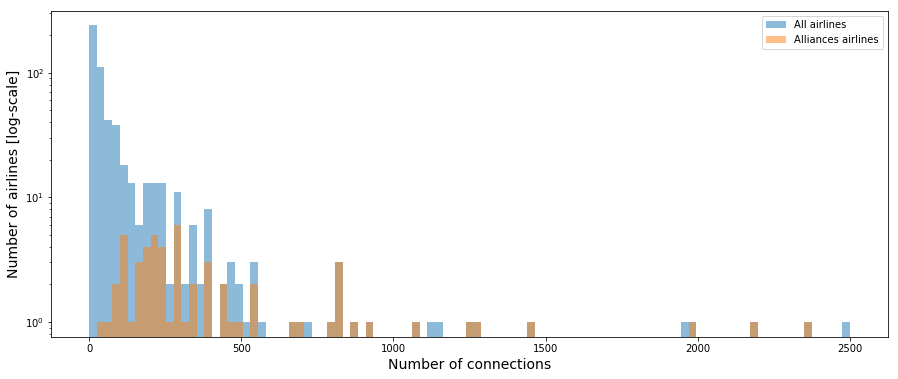

In [34]:
bins = np.linspace(0, 2500, 100)
plt.figure(figsize=(15,6))
plt.hist(routes_alce[['Airline']].groupby('Airline').size(), bins, alpha=0.5, label='All airlines')
plt.hist(routes_alce_only[['Airline']].groupby('Airline').size(), bins, alpha=0.5, label='Alliances airlines')
plt.legend(loc='upper right')
#plt.title('Number of airlines per number of connections', fontsize = 18)
plt.ylabel('Number of airlines [log-scale]', fontsize = 14)
plt.xlabel('Number of connections', fontsize= 14)
plt.yscale("log")
plt.savefig('Histogram_connections_airlines.pdf')
plt.show()


In [32]:
df = routes_alce[['Airline', 'Alliance', 'Name']].groupby(['Airline', 'Alliance', 'Name']).size().reset_index(name='counts')

In [33]:
df.head()

,Airline,Alliance,Name,counts
0,A3,Star Alliance,Aegean Airlines,222
1,AA,One World,American Airlines,2354
2,AB,One World,Air Berlin,798
3,AC,Star Alliance,Air Canada,705
4,AF,SkyTeam,Air France,1071


In [34]:
# annotation alliances
df[df.counts>1000]

,Airline,Alliance,Name,counts
1,AA,One World,American Airlines,2354
4,AF,SkyTeam,Air France,1071
12,CA,Star Alliance,Air China,1260
16,CZ,SkyTeam,China Southern Airlines,1454
17,DL,SkyTeam,Delta Air Lines,1981
36,MU,SkyTeam,China Eastern Airlines,1263
59,UA,Star Alliance,United Airlines,2180


In [14]:
# annotation
routes_nonall = routes_alce[routes_alce.IATA.isnull()]
df_nonall = routes_nonall[['Airline']].groupby('Airline').size().reset_index(name='counts')
df_nonall[df_nonall.counts>1000]

,Airline,counts
180,FR,2484
421,U2,1130
433,US,1960
463,WN,1146


Creation of the weighted adjacency matrix. We first create a 3D tensor with dimensions {source, destination, alliance}. That way we can keep the weight intact for each flight.
* No edges = 0
* No alliances = 1
* Star Alliance = 2
* One World = 3
* SkyTeam = 4

In [15]:
# 3D - adjacency matrix
routes_alce = routes_alce.fillna("None")
routes_alce.head(2)
# import of source and destination airport
source_airports = routes[['SourceAirport']]
source_airports = source_airports.rename(columns={'SourceAirport':'Airport'})

dest_airports = routes[['DestinationAirport']]
dest_airports = dest_airports.rename(columns={'DestinationAirport':'Airport'})

# creation of a dataframe with all airport and airport_idx 
# (we use airport_idx insteed of airportID because some airports have no airportID)
airportsID = pd.concat([source_airports,dest_airports]).drop_duplicates().reset_index().drop(columns=['index']).reset_index()
airportsID = airportsID.set_index('Airport').rename(columns={'index':'airportsID'})

alliances_idx = {"None":1, "Star Alliance":2, "One World":3, "SkyTeam":4}

n_nodes = len(airportsID)
adjacency = np.zeros((n_nodes, n_nodes, 5), dtype=int)
for idx,row in routes_alce.iterrows():
    
    idx_source = airportsID.loc[row.SourceAirport, "airportsID"]
    idx_dest = airportsID.loc[row.DestinationAirport, "airportsID"]
    category = alliances_idx[row.Alliance]
    
    adjacency[idx_source, idx_dest, category] += 1
    adjacency[idx_dest, idx_source, category] += 1

In [16]:
adjacency[:10, :10, 1]

array([[0, 0, 2, 0, 0, 0, 2, 2, 2, 0],
       [0, 0, 2, 0, 0, 0, 2, 0, 0, 0],
       [2, 2, 0, 6, 2, 4, 6, 6, 4, 2],
       [0, 0, 6, 0, 0, 2, 2, 2, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 2, 2, 2],
       [0, 0, 4, 2, 0, 0, 0, 0, 0, 0],
       [2, 2, 6, 2, 0, 0, 0, 4, 0, 0],
       [2, 0, 6, 2, 2, 0, 4, 0, 0, 2],
       [2, 0, 4, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 2, 0, 0, 2, 0, 0]])

# How prevalent are the alliances in the global flight route network?

For each alliance i, label the airports served by an alliance i flight, and compare the density of the alliance i airport network to the whole network density (check if the alliance network is connected, and maybe there are interesting relations between the big component/small components and the alliances), and do this analysis 3 times. Then do the same analysis but for all the alliances together. This should allow us to see how many airports are not served by alliance airlines, and what is the proportion of airports that are served by one alliance compared to airports served by 2 or all the alliances.

**Some insights**

All the alliances networks only have one connected component


### Alliance Analysis

In [2]:
def network_analysis(A):
    '''Function that returns graph properties on the one connected component: average degree, 
    maximum and minimum degree, number of nodes, diameter of the graph and average clustering 
    coefficient of the largest connected component.
    A histogram of the degree distribution is also plotted.
    The analysis is done on the unweighted adjacency matrix.
    '''
    #create an unweighted adjacency matrix
    A_nonw = np.copy(A)
    A_nonw[A_nonw!=0]=1 
    # adjacency matrix of only the alliance network
    A_trunc = A_nonw[~np.all(A_nonw == 0, axis=1)]
    A_largest = A_trunc[:, ~np.all(A_trunc == 0, axis=0)]
    G = nx.from_numpy_matrix(A_nonw)
    G_largest = max(nx.connected_component_subgraphs(G), key=len)
    
    # nodes
    nodes = A_largest.shape[0]
    print('\nNumber of airports connected to the alliance network: ', nodes)
    degree_w = np.sum(A, axis = 0)
    print('\nWeighted graph: Number of connections: ', np.sum(A)/2, '\naverage degree = ', np.sum(degree_w)/nodes, '\nmaximum degree', max(degree_w))
    
    # degree
    degree = np.sum(A_largest, axis=0) 
    print('\nNumber of edges: ', np.sum(A_nonw)/2, '\naverage degree = ', round(np.average(degree),2), '\nmaximum degree = ', max(degree), '\nminimum degree = ', min(degree))
  
    # diameter an cluster coefficient
    print('\nDiameter of the graph: ', nx.diameter(G_largest), '\nAverage clustering coefficient: ', nx.average_clustering(G_largest))
    
    # plot the degree distribution
    plt.hist(degree, bins = 50);
    
    return


Number of airports connected to the alliance network:  3425

Weighted graph: Number of connections:  67662.0 
average degree =  39.51065693430657 
maximum degree 1826

Number of edges:  19256.5 
average degree =  11.24 
maximum degree =  248 
minimum degree =  1

Diameter of the graph:  13 
Average clustering coefficient:  0.48833620245296055


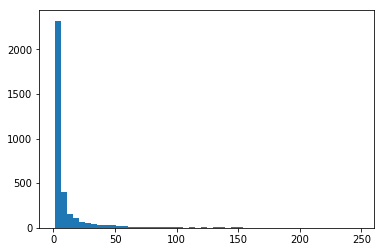

In [20]:
# Analysis on the normal adjacency matrix (as in Milestone 1)
adjacency_normal =  np.sum(adjacency, axis=2)
network_analysis(adjacency_normal) # the results are the same!!!


Number of airports connected to the alliance network:  1221

Weighted graph: Number of connections:  11267.0 
average degree =  18.455364455364457 
maximum degree 587

Number of edges:  4385.0 
average degree =  7.18 
maximum degree =  226 
minimum degree =  1

Diameter of the graph:  9 
Average clustering coefficient:  0.47060521430020946


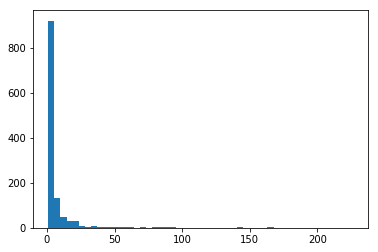

In [21]:
# Analysis on the Star Alliance network
adjacency_star =  adjacency[:,:, 2]
network_analysis(adjacency_star) 


Number of airports connected to the alliance network:  953

Weighted graph: Number of connections:  7288.0 
average degree =  15.29485834207765 
maximum degree 646

Number of edges:  3063.0 
average degree =  6.43 
maximum degree =  184 
minimum degree =  1

Diameter of the graph:  9 
Average clustering coefficient:  0.4381413258767767


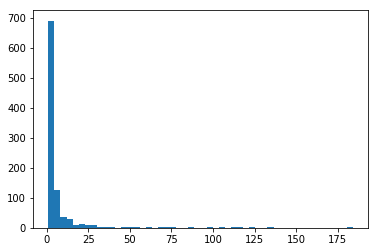

In [22]:
# Analysis on One World
adjacency_world =  adjacency[:,:, 3]
network_analysis(adjacency_world) 


Number of airports connected to the alliance network:  1081

Weighted graph: Number of connections:  10794.0 
average degree =  19.970397779833487 
maximum degree 1319

Number of edges:  4006.0 
average degree =  7.41 
maximum degree =  210 
minimum degree =  1

Diameter of the graph:  9 
Average clustering coefficient:  0.48923958526273087


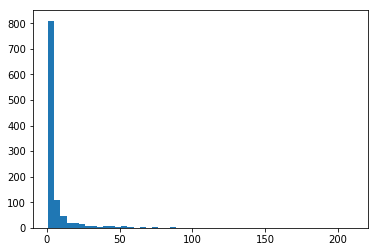

In [23]:
# Analysis on SkyTeam
adjacency_sky =  adjacency[:,:, 4]
network_analysis(adjacency_sky) 


Number of airports connected to the alliance network:  1797

Weighted graph: Number of connections:  29349.0 
average degree =  32.664440734557594 
maximum degree 1405

Number of edges:  9656.0 
average degree =  10.75 
maximum degree =  228 
minimum degree =  1

Diameter of the graph:  9 
Average clustering coefficient:  0.5317438109187125


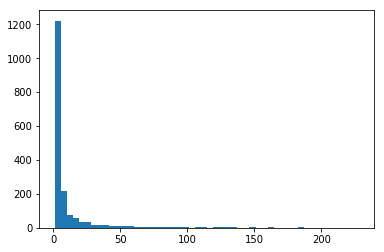

In [24]:
# Analysis on the whole alliance network
adjacency_alce = np.sum(adjacency[:,:, 2:], axis = 2)
network_analysis(adjacency_alce) 

In [166]:
# pairwise networks
# Analysis on the star & one world network
#adjacency_star_world = np.sum(adjacency[:,:, 2:4], axis = 2)
#network_analysis(adjacency_star_world) 

In [167]:
# Analysis on the star & skyteam network
#adjacency_star_sky = np.sum(adjacency[:,:, [2,4]], axis = 2)
#network_analysis(adjacency_star_sky)

In [168]:
# Analysis on the world & skyteam network
#adjacency_sky_world = np.sum(adjacency[:,:, 3:], axis = 2)
#network_analysis(adjacency_sky_world)

In [17]:
# Analysis of parallel edges inside one alliance
# SkyTeam
adjacency_sky = adjacency[:,:,4]
print('SkyTeam \nNumber of single edges: {} \n2 parallel edges: {} \nmore than 2: {}'.format(np.sum(adjacency_sky == 1), 
      np.sum(adjacency_sky == 2), np.sum(adjacency_sky > 2)))

# Star Alliance
adjacency_star = adjacency[:,:,2]
print('\nStar Alliance \nNumber of single edges: {} \n2 parallel edges: {} \nmore than 2: {}'.format(np.sum(adjacency_star == 1), 
      np.sum(adjacency_star == 2), np.sum(adjacency_star > 2)))

# One World
adjacency_world = adjacency[:,:,3]
print('\nStar Alliance \nNumber of single edges: {} \n2 parallel edges: {} \nmore than 2: {}'.format(np.sum(adjacency_world == 1), 
      np.sum(adjacency_world == 2), np.sum(adjacency_world > 2)))



SkyTeam 
Number of single edges: 200 
2 parallel edges: 5754 
more than 2: 2058

Star Alliance 
Number of single edges: 184 
2 parallel edges: 5588 
more than 2: 2998

Star Alliance 
Number of single edges: 148 
2 parallel edges: 4836 
more than 2: 1142


## Resumé of the alliance analysis

The star alliance is the most prevalent among the three alliances. It serves the largest number of airports and has the most flights. The star alliance is followed by SkyTeam which serves a similar number of airports and has a similar number of flights. However, its network is more dense, shown by a slightly higher average degree (7.41 vs 7.18). One World is the smallest alliance with 7288 flights compared to 11267 and 10794 flights for the Star Alliance and SkyTeam, respectively. Its network is more sparsely connected (average degree = 6.43) and it has the lowest average clustering coefficient (One World: 0.44, Star Alliance: 0.47, SkyTeam: 0.49). 

The degree distribution in the global flight network follows a power law, and the network is characterized by the presence of a few very large hubs and a lot of nodes with only a few links. This behaviour is even more pronounced when we analyze the alliance-network alone. Even though the alliance network has less flights (29349 compared to 67662) and serves fewer airports (1797 compared to 3425), the largest hub has a degree very close to the degree of the whole network (228 compared to 248). The average degree is slightly lower (11.24 compared to 10.75), but the clustering coefficient is a little bit higher (0.53 compared to 0.49). As expected, the alliance network is more concentrated and it forms a single component, whereas the whole network had 8 components. In addition, the diameter of the alliance network equals 9 which shows that the alliance network is less spread out than the whole flight route network which has a diameter of 13. 


## Proportion of airports served by alliance-airlines

Define the number of airports served by either: SkyTeam, Star Alliance, One World, SkyTeam + One World, SkyTeam + Star Alliance, One World + Star Alliance, all, no alliance.



In [18]:
def airport_vector(A):
    '''Function that given an adjacency matrix returns a binary vector with the length of the airports (nodes). 
    1 means that the node has an edge, and 0 if not.'''
    v_airport = A.any(1).astype(int)
    return v_airport

In [19]:
# generate airport vectors for the four categories
airport_star = airport_vector(adjacency_star)
airport_world = airport_vector(adjacency_world)
airport_sky = airport_vector(adjacency_sky)
airport_noall = airport_vector(adjacency[:,:,1])

In [30]:
# generate the number of airports for the seven combinations
n_no_alliance = np.count_nonzero((airport_noall - airport_sky- airport_star - airport_world).clip(min=0))
n_sky = np.count_nonzero((airport_sky- airport_star - airport_world).clip(min=0))
n_star = np.count_nonzero((airport_star- airport_sky - airport_world).clip(min=0))
n_world = np.count_nonzero((airport_world- airport_star - airport_sky).clip(min=0))
n_sky_star = np.sum((airport_sky + airport_star - airport_world) == 2)
n_sky_world = np.sum((airport_sky - airport_star + airport_world) == 2)
n_world_star = np.sum((airport_world + airport_star - airport_sky) == 2)
n_all = np.sum((airport_sky + airport_star + airport_world) == 3)

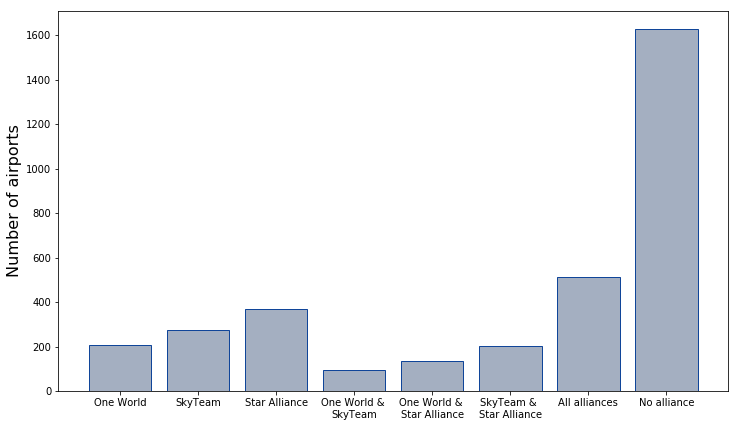

In [147]:
n_airports = [n_world, n_sky, n_star, n_sky_world, n_world_star, n_sky_star, n_all, n_no_alliance]
airport_label = ['One World', 'SkyTeam', 'Star Alliance', 'One World & \nSkyTeam', 
                 'One World & \nStar Alliance', 'SkyTeam & \nStar Alliance', 'All alliances', 'No alliance']
plt.figure(figsize=(12,7))
plt.bar(np.arange(1,9), n_airports, tick_label = airport_label, color = '#a4afc1', edgecolor = '#104599')
plt.ylabel('Number of airports', fontsize =  16)
#plt.savefig('Number_airports_alliances.pdf')

## Analysis of the plot
Following the previous analysis, this plot shows again that most of the airports are not served by an airline belonging to one of the alliances. The majority of airports in the alliance network are only served by one alliance (852 airports in total). However, a lot of airports are also served by all the three alliances, and interestingly this number is significantly higher than the number of airports that are served by 2 alliances (432 compared to 513 airports). This distribution might hint a conflict of interest, in the sense that an alliance is not serving an airport which is already served by another alliance, but also the fact that big hubs are likely to be served by all the alliances, whereas small airports are only served by one alliance. In the following we will analyze whether this assumption holds.

# Q2 Is the alliance business a hub thing? 
- We label the airports by the number of alliances flights that serve it (0, 1, 2 or 3) and we analyze the correlation between this number and the degree of the airport. We expect that a lower degree airport is less likely to be connected to the alliance network than big hubs.

- Case study on big cities which have multiple airports (e.g. London, Paris, Rome): is there a trend that only a few airports are served by alliance airports? If yes, then how does the correlation from the previous point change if we substract "the big city non-alliance airports", to get a better insight of the geographic expansion (vs. airport expansion) of the alliance network (maybe sth. to consider on the previous question as well).

In [20]:
# create an airport vector with the number of alliances serving it
airport_num_alce = airport_world + airport_sky + airport_star

In [21]:
np.sum(airport_num_alce == 2), np.sum(airport_num_alce == 3), np.sum(airport_num_alce == 1)

(432, 513, 852)

In [24]:
# degree distribution
### of the whole network
# create the unweighted adjacency matrix 
A_nonw = np.copy(adjacency_normal)
A_nonw[A_nonw!=0]=1 
degree_all = np.sum(A_nonw, axis=0) 
### of the alliance's network
A_nonw = np.copy(np.sum(adjacency[:,:,2:], axis = 2))
A_nonw[A_nonw!=0]=1 
degree_alce = np.sum(A_nonw, axis=0) 

In [25]:
# delete the zero case for the alliances
airport_alce_only = airport_num_alce[airport_num_alce!=0]
degree_alce_only = degree_alce[airport_num_alce!=0]

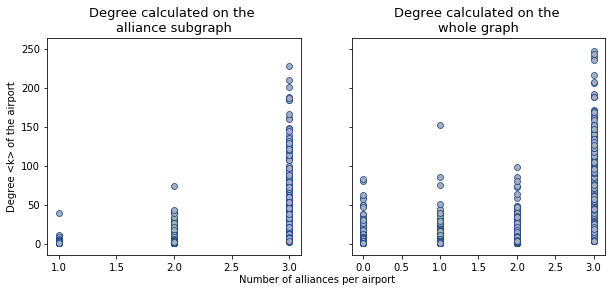

In [29]:
f, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)
#sns.barplot(x = airport_label, y = n_airports, ax = axes[0])
sns.scatterplot(x = airport_alce_only, y = degree_alce_only, ax = axes[0], color = '#a4afc1', edgecolor = '#1e4584')
#sns.scatterplot(x = alce_median.index, y = alce_median['degree'], ax = axes[0], color = 'black')
#sns.scatterplot(x = alce_mean.index, y = alce_mean['degree'], ax = axes[0], color = 'blue')
sns.scatterplot(x = airport_num_alce, y = degree_all, ax = axes[1],  color = '#a4afc1', edgecolor = '#1e4584')
axes[0].set_title('Degree calculated on the \nalliance subgraph', fontsize = 13)
axes[1].set_title('Degree calculated on the \nwhole graph', fontsize = 13)
axes[0].set_ylabel('Degree <k> of the airport')
f.text(0.5, 0.03, 'Number of alliances per airport', ha='center')
plt.savefig('degree_numalce.pdf')

In [170]:
# find the airport with num_alce == 1 and degree above 100
df_all = pd.DataFrame({'num_alce': airport_num_alce, 'degree': degree_all})
df_all[(df_all.num_alce == 1) & (df_all.degree > 90)]

,num_alce,degree
488,1,153


In [171]:
airportsID[airportsID.airportsID == 488]

,airportsID
Airport,
STN,488


In [172]:
# which alliance
np.sum(adjacency[488,:,3])

2

In [134]:
alce_median = df_alce.groupby('num_alce').median()
alce_mean = df_alce.groupby('num_alce').mean()
alce_median.index

Int64Index([1, 2, 3], dtype='int64', name='num_alce')

# Label Propagation 

ColorCode :
- 1 if Star Alliance only
- 2 if One World only
- 3 if SkyTeam only
- 4 if Star Alliance and One World
- 5 if One World and SkyTeam
- 6 if SkyTeam and Star Alliance
- 7 if all

In [49]:
# Go back to a DataFrame where each airport is attributed to an alliance
airport_attribution = airportsID.copy()
airport_attribution['Alliance'] = np.nan

for airport in airport_attribution.index :
    idx = int(airport_attribution.loc[airport].airportsID)
    SA = np.sum(adjacency[idx, :, 2]) + np.sum(adjacency[:, idx, 2])
    OW = np.sum(adjacency[idx, :, 3]) + np.sum(adjacency[:, idx, 3])
    ST = np.sum(adjacency[idx, :, 4]) + np.sum(adjacency[:, idx, 4])
    if (SA==OW) & (SA==ST):
        if SA == 0:
            airport_attribution.loc[airport,'Alliance']= "No Alliance"
        else:
            airport_attribution.loc[airport,'Alliance']= 7 
    elif (SA == OW) & (SA == max(SA, OW, ST)):
        airport_attribution.loc[airport,'Alliance']= 4
    elif (SA == ST) & (SA == max(SA, OW, ST)):
        airport_attribution.loc[airport,'Alliance']= 6
    elif (OW == ST) & (ST == max(SA, OW, ST)):
        airport_attribution.loc[airport,'Alliance'] = 5
    elif SA==max(SA,OW,ST) :
        airport_attribution.loc[airport,'Alliance']= 1
    elif OW==max(SA,OW,ST) :
        airport_attribution.loc[airport,'Alliance']= 2
    elif ST==max(SA,OW,ST) :
        airport_attribution.loc[airport,'Alliance']= 3

In [75]:
## DON'T EXECUTE THIS

# Go back to a DataFrame where each airport is attributed to an alliance
airport_attribution = airportsID.copy()
airport_attribution['Alliance'] = np.nan

for airport in airport_attribution.index :
    idx = int(airport_attribution.loc[airport].airportsID)
    SA = np.sum(adjacency[idx, :, 2]) + np.sum(adjacency[:, idx, 2])
    OW = np.sum(adjacency[idx, :, 3]) + np.sum(adjacency[:, idx, 3])
    ST = np.sum(adjacency[idx, :, 4]) + np.sum(adjacency[:, idx, 4])
    if (SA==OW) & (SA==ST):
        if SA == 0:
            airport_attribution.loc[airport,'Alliance']= "No Alliance"
        else:
            airport_attribution.loc[airport,'Alliance']= "All"
    elif (SA == OW) & (SA == max(SA, OW, ST)):
        airport_attribution.loc[airport,'Alliance']="Star Alliance & One World"
    elif (SA == ST) & (SA == max(SA, OW, ST)):
        airport_attribution.loc[airport,'Alliance']="Star Alliance & SkyTeam"
    elif (OW == ST) & (ST == max(SA, OW, ST)):
        airport_attribution.loc[airport,'Alliance']="One World & SkyTeam"
    elif SA==max(SA,OW,ST) :
        airport_attribution.loc[airport,'Alliance']="Star Alliance"
    elif OW==max(SA,OW,ST) :
        airport_attribution.loc[airport,'Alliance']="One World"
    elif ST==max(SA,OW,ST) :
        airport_attribution.loc[airport,'Alliance']="SkyTeam"

In [76]:
airport_attribution.groupby('Alliance').count()

,airportsID
Alliance,
All,17
No Alliance,1628
One World,370
One World & SkyTeam,45
SkyTeam,607
Star Alliance,652
Star Alliance & One World,50
Star Alliance & SkyTeam,56


In [61]:
airport_attribution.head()

,airportsID,Alliance
Airport,,
ASF,0,All
CEK,1,One World
DME,2,One World
EGO,3,No Alliance
GYD,4,Star Alliance


In [50]:
country_ref=airports[['Country','IATA']]
country_ref.rename(columns={"IATA": "Airport"},inplace=True)
country_ref.set_index('Airport', inplace=True)

airport_attribution = pd.merge(airport_attribution, country_ref,  on='Airport')
airport_attribution.drop(columns=['airportsID'], inplace=True)

/Users/Marie/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [51]:
airport_attribution.head()

,Alliance,Country
Airport,,
ASF,7,Russia
CEK,2,Russia
DME,2,Russia
EGO,No Alliance,Russia
GYD,1,Azerbaijan


### COMPARAISON BETWEEN THE TWO DISTRIBUTION

From Maelle's notebook

In [52]:
# For countries of airlines of alliances
country_attribution = pd.DataFrame(data={'Country': [], 'ColorCode': []});
for country in airl_alliances.Country.unique():
    alliances = airl_alliances[airl_alliances.Country==country].Alliance.unique()
    if 'Star Alliance' in alliances:
        if 'One World' in alliances:
            if 'SkyTeam' in alliances :
                colorCode = 7
            else :
                colorCode = 4
        elif 'SkyTeam' in alliances :
            coloCode = 6
        else :
            colorCode = 1
    elif 'One World' in alliances :
        if 'SkyTeam' in alliances :
            colorCode = 5
        else :
            colorCode = 2
    elif 'SkyTeam' in alliances :
        colorCode = 3
    country_attribution = country_attribution.append({'Country':country, 'ColorCode':colorCode},ignore_index=True)

country_attribution = country_attribution.set_index('Country')

In [53]:
country_attribution.head()

,ColorCode
Country,
Slovenia,1.0
Greece,1.0
Canada,1.0
China,1.0
New Zealand,1.0


In [54]:
def compare(alliance, airport_attribution, country_attribution) :
    if alliance=='Star Alliance' :
        val=[1,4,6,7]
    elif alliance=='One World' :
        val=[2,4,5,7]
    elif alliance=='SkyTeam' :
        val=[3,5,6,7]
    else :
        print('The alliance parameter is not correct.')
        return
    
    print('Comparison between country and airport attribution for '+alliance)
    print()
    
    list1 = list(country_attribution[country_attribution['ColorCode'].isin(val)].index)
    print('Countries where the companies of the alliance have their basis :',len(list1))
    print(list1)
    print()
    
    list2 = list(airport_attribution[airport_attribution['Alliance'].isin(val)].Country.unique())
    print('Countries where the alliance dominates airports :',len(list2))
    print(list2)
    print()
    
    inBoth=set(list1) & set(list2)
    print('Countries that are in both lists :',len(inBoth))
    print(inBoth)

#### For Star Alliance

In [55]:
compare('Star Alliance',airport_attribution,country_attribution)

Comparison between country and airport attribution for Star Alliance

Countries where the companies of the alliance have their basis : 25
['Slovenia', 'Greece', 'Canada', 'China', 'New Zealand', 'Japan', 'Republic of Korea', 'United States', 'Austria', 'AVIANCA', 'Belgium', 'Panama', 'Croatia', 'Egypt', 'Ethiopia', 'Taiwan', 'Poland', 'Germany', 'Sweden', 'Singapore', 'South Africa', 'Switzerland', 'Portugal', 'Thailand', 'Turkey']

Countries where the alliance dominates airports : 145
['Russia', 'Azerbaijan', "Cote d'Ivoire", 'Ghana', 'Mali', 'Benin', 'Senegal', 'Togo', 'Niger', 'Burkina Faso', 'Colombia', 'Switzerland', 'Cyprus', 'Egypt', 'Sweden', 'Norway', 'Finland', 'Brazil', 'United States', 'Gambia', 'Guinea', 'Cameroon', 'Sierra Leone', 'Nigeria', 'Guinea-Bissau', 'Liberia', 'Canada', 'Djibouti', 'Somalia', 'Thailand', 'Japan', 'Burma', 'Singapore', 'Germany', 'Austria', 'Italy', 'Croatia', 'Bahamas', 'Belgium', 'Turkey', 'Aruba', 'Netherlands Antilles', 'Venezuela', 'China', '

#### FOR ONE WORLD

In [56]:
compare('One World',airport_attribution,country_attribution)

Comparison between country and airport attribution for One World

Countries where the companies of the alliance have their basis : 15
['Japan', 'Republic of Korea', 'United States', 'Germany', 'Russia', 'Spain', 'United Kingdom', 'Hong Kong SAR of China', 'Finland', 'Chile', 'Malaysia', 'Australia', 'Qatar', 'Jordan', 'Sri Lanka']

Countries where the alliance dominates airports : 94
['Russia', 'Peru', 'Ecuador', 'Italy', 'Spain', 'Finland', 'United Arab Emirates', 'Philippines', 'United States', 'Gambia', 'United Kingdom', 'Australia', 'Hong Kong', 'Japan', 'Malaysia', 'Germany', 'Austria', 'Bahamas', 'Morocco', 'Netherlands Antilles', 'Venezuela', 'Uzbekistan', 'Montenegro', 'Antigua and Barbuda', 'Dominica', 'Bangladesh', 'Oman', 'Canada', 'Mexico', 'Turkey', 'Egypt', 'Greece', 'Brunei', 'Chile', 'Paraguay', 'Belize', 'Honduras', 'India', 'Burma', 'Jamaica', 'Dominican Republic', 'Trinidad and Tobago', 'Tajikistan', 'Argentina', 'Jordan', 'British Virgin Islands', 'Puerto Rico', 'Vi

#### SkyTeam

In [57]:
compare('SkyTeam',airport_attribution,country_attribution)

Comparison between country and airport attribution for SkyTeam

Countries where the companies of the alliance have their basis : 15
['United States', 'Russia', 'Argentina', 'Mexico', 'Spain', 'France', 'Italy', 'Czech Republic', 'Indonesia', 'Kenya', 'Netherlands', 'Lebanon', 'Saudi Arabia', 'Romania', 'Vietnam']

Countries where the alliance dominates airports : 81
['Russia', 'Niger', 'Italy', 'France', 'United Kingdom', 'Norway', 'Philippines', 'Brazil', 'United States', 'Liberia', 'Djibouti', 'Kenya', 'China', 'Cambodia', 'Vietnam', 'Taiwan', 'Netherlands', 'Morocco', 'Netherlands Antilles', 'Uzbekistan', 'French Guiana', 'Martinique', 'Guadeloupe', 'Dominican Republic', 'Saint Lucia', 'Bangladesh', 'Saudi Arabia', 'Argentina', 'Mexico', 'Cuba', 'Pakistan', 'Algeria', 'Czech Republic', 'Tunisia', 'Indonesia', 'Paraguay', 'Uruguay', 'India', 'Germany', 'Burma', 'Armenia', 'South Korea', 'Haiti', 'Suriname', 'Tajikistan', 'Kyrgyzstan', 'Romania', 'United Arab Emirates', 'Albania', 'Be

### Label propagation
First, we create a new airport attribution matrix with dummy columns for each alliance, filled with 1 if that alliance is a major alliance for this airport. 

In [73]:
airport_attribution_dummy = pd.DataFrame({'airport': airportsID.index, 'airportsID': airportsID.airportsID,
                                        'Star Alliance': np.zeros(airportsID.shape[0]), 'One World': np.zeros(airportsID.shape[0]),
                                        'SkyTeam': np.zeros(airportsID.shape[0])})

In [74]:
airport_attribution_dummy.head(2)

,airport,airportsID,Star Alliance,One World,SkyTeam
Airport,,,,,
ASF,ASF,0,0.0,0.0,0.0
CEK,CEK,1,0.0,0.0,0.0


In [77]:
for airport in airport_attribution.index :
    idx = int(airport_attribution.loc[airport].airportsID)
    SA = np.sum(adjacency[idx, :, 2]) + np.sum(adjacency[:, idx, 2])
    OW = np.sum(adjacency[idx, :, 3]) + np.sum(adjacency[:, idx, 3])
    ST = np.sum(adjacency[idx, :, 4]) + np.sum(adjacency[:, idx, 4])
    if (SA==OW) & (SA==ST):
        if SA != 0:
            airport_attribution_dummy.loc[airport,'Star Alliance'] += 1
            airport_attribution_dummy.loc[airport,'One World'] += 1
            airport_attribution_dummy.loc[airport,'SkyTeam'] += 1
    elif (SA == OW) & (SA == max(SA, OW, ST)):
        airport_attribution_dummy.loc[airport,'Star Alliance'] += 1
        airport_attribution_dummy.loc[airport,'One World'] += 1
    elif (SA == ST) & (SA == max(SA, OW, ST)):
        airport_attribution_dummy.loc[airport,'Star Alliance'] += 1
        airport_attribution_dummy.loc[airport,'SkyTeam'] += 1
    elif (OW == ST) & (ST == max(SA, OW, ST)):
        airport_attribution_dummy.loc[airport,'One World'] += 1
        airport_attribution_dummy.loc[airport,'SkyTeam'] += 1
    elif SA==max(SA,OW,ST) :
        airport_attribution_dummy.loc[airport,'Star Alliance'] += 1
    elif OW==max(SA,OW,ST) :
        airport_attribution_dummy.loc[airport,'One World'] += 1
    elif ST==max(SA,OW,ST) :
        airport_attribution_dummy.loc[airport,'SkyTeam'] += 1

In [78]:
airport_attribution_dummy.head()

,airport,airportsID,Star Alliance,One World,SkyTeam
Airport,,,,,
ASF,ASF,0,1.0,1.0,1.0
CEK,CEK,1,0.0,1.0,0.0
DME,DME,2,0.0,1.0,0.0
EGO,EGO,3,0.0,0.0,0.0
GYD,GYD,4,1.0,0.0,0.0


In [79]:
airportsID.shape

(3425, 1)

In [80]:
# change the index
airport_alce = airport_attribution_dummy.copy()
airport_alce.index = airportsID.airportsID
# First we only work on airports with a label 
airport_alce = airport_alce[airport_alce[['Star Alliance', 'One World', 'SkyTeam']].sum(axis=1) != 0].copy()
# add a column with a label 1 if labelled or 0 if unlabelled, and we choose to unlabel 1/2
airport_alce['labelled'] = np.random.choice([0, 1], size=(airport_alce.shape[0],), p=[1./2, 1./2])
# add a column to indicate whether an unlabelled airport needs to be labelled
airport_alce['tolabel'] = np.zeros(airport_alce.shape[0])
airport_alce['tolabel'][airport_alce.labelled==0] = 1
# add new columns for the predicted alliance for the unlabelled airports
airport_alce['Star Alliance pred'] = np.zeros(airport_alce.shape[0])
airport_alce['One World pred'] = np.zeros(airport_alce.shape[0])
airport_alce['SkyTeam pred'] = np.zeros(airport_alce.shape[0])
airport_alce.head()

/Users/Marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,airport,airportsID,Star Alliance,One World,SkyTeam,labelled,tolabel,Star Alliance pred,One World pred,SkyTeam pred
airportsID,,,,,,,,,,
0,ASF,0,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0
1,CEK,1,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0
2,DME,2,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0
4,GYD,4,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0
5,KGD,5,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0


In [82]:
# label propagation algorithm based on Maelle's algorithm
def propagate_labels(airport_data, adjacency):
    '''NEED EXPLANATION'''
    airport_attr = airport_data.copy()
    list_airport_to_label = list(airport_attr[airport_attr.tolabel == 1].airportsID)
    while list_airport_to_label != [] :
        # we randomly chose a point
        number_airport=len(list_airport_to_label)
        if number_airport>1:
            airport= list_airport_to_label[random.randint(0,number_airport-1)]
        else:
            airport= list_airport_to_label[0]
            
        # find the neighbours of the airport
        neighbours = np.argwhere(adjacency[airport,]!=0)
        neighbours = [item for sublist in neighbours for item in sublist] # unlist neighbours
        
        #only use the neighbours that have an alliance label
        #neighbours = np.setdiff1d(neighbours,airport_notalce)
        
        # sum up the alliances labels of the labelled neighbour nodes
        values = airport_attr[['Star Alliance', 'One World', 'SkyTeam']][(airport_attr.airportsID.isin(neighbours)) & (airport_attr.labelled == 1)].sum()
        
        # add the votes of the newly predicted neighbour airports
        values_neigh_pred = list(airport_attr[['Star Alliance pred', 'One World pred', 'SkyTeam pred']][(airport_attr.airportsID.isin(neighbours)) & (airport_attr.labelled == 0)].sum())
        values = values+values_neigh_pred
        
        # if there is no majority alliance, skip this round
        if sum(values) == 0:
            continue
        # get the major alliance
        alliance = list(values[values == max(values)].index)
        # add 'pred' after the alliance to match the column name
        alliance_pred = [s + ' pred' for s in alliance]
        # attribute the label
        airport_attr.loc[airport, alliance_pred] = 1
        
        # remove the 'tolabel' for this airport
        airport_attr.loc[airport, 'tolabel'] = 0
        list_airport_to_label = list(airport_attr[airport_attr.tolabel == 1].airportsID)
    #return results
    return airport_attr

In [83]:
# create the unweighted alliance adjacency matrix
adjacency_alce = np.sum(adjacency[:,:,2:], axis=2)
A_nonw = np.copy(adjacency_alce)
A_nonw[A_nonw!=0]=1 
# take out the airports that do not belong to the alliance 
#airport_notalce = list(airport_attribution_dummy['airportsID'][airport_attribution_dummy[['Star Alliance', 'One World', 'SkyTeam']].sum(axis=1) == 0])

In [84]:
airport_attr = propagate_labels(airport_alce, A_nonw)

In [85]:
airport_attr.head(10)

,airport,airportsID,Star Alliance,One World,SkyTeam,labelled,tolabel,Star Alliance pred,One World pred,SkyTeam pred
airportsID,,,,,,,,,,
0,ASF,0,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0
1,CEK,1,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0
2,DME,2,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0
4,GYD,4,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0
5,KGD,5,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0
6,KZN,6,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0
7,LED,7,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0
8,MRV,8,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0
9,NBC,9,0.0,0.0,1.0,0,0.0,0.0,0.0,1.0


In [108]:
# calculate the correctness
# get the predicted airports
airport_pred = airport_attr[airport_attr.labelled == 0]
num_pred = airport_pred.shape[0]
print('Number of airports for which a label is predicted', num_pred)
print('Total number of airports', airport_attr.shape[0])

print('correctness for the individual alliances')
print('Star Alliance', sum((airport_pred['Star Alliance'] == airport_pred['Star Alliance pred']))/num_pred)
print('One World', sum((airport_pred['One World'] == airport_pred['One World pred']))/num_pred)
print('SkyTeam', sum((airport_pred['SkyTeam'] == airport_pred['SkyTeam pred']))/num_pred)

#overall correctness
true_val = list(zip(airport_pred['Star Alliance'], airport_pred['One World'], airport_pred['SkyTeam'])) 
pred_val = list(zip(airport_pred['Star Alliance pred'], airport_pred['One World pred'], airport_pred['SkyTeam pred']))
accuracy_val = sum(i == j for i,j in zip(true_val, pred_val))
print('Overall correctness: ', accuracy_val, 'Accuracy (%): ', accuracy_val/num_pred)

Number of airports for which a label is predicted 883
Total number of airports 1797
correctness for the individual alliances
Star Alliance 0.8052095130237825
One World 0.8437146092865232
SkyTeam 0.8471121177802945
Overall correctness:  624 Accuracy (%):  0.7066817667044167


In [87]:
# 2nd step: keep all the known airport with a major alliance labelled 
# and predict the airports with no alliance serving them (for all the 
# airports inside the biggest connected component)

# change the index
airport_all = airport_attribution_dummy.copy()
airport_all.index = airportsID.airportsID

# add a column labelled with 1/True if the airport is served by an alliance and 0/False if not
airport_all['labelled'] = airport_all[['Star Alliance', 'One World', 'SkyTeam']].sum(axis=1) != 0

# add a column to indicate whether an unlabelled airport (airport with no alliance) needs to be labelled
airport_all['tolabel'] = np.zeros(airport_all.shape[0])
airport_all['tolabel'][~airport_all.labelled] = 1 

# add new columns for the predicted alliance for the unlabelled airports
airport_all['Star Alliance pred'] = np.zeros(airport_all.shape[0])
airport_all['One World pred'] = np.zeros(airport_all.shape[0])
airport_all['SkyTeam pred'] = np.zeros(airport_all.shape[0])
airport_all.head()

/Users/Marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,airport,airportsID,Star Alliance,One World,SkyTeam,labelled,tolabel,Star Alliance pred,One World pred,SkyTeam pred
airportsID,,,,,,,,,,
0,ASF,0,1.0,1.0,1.0,True,0.0,0.0,0.0,0.0
1,CEK,1,0.0,1.0,0.0,True,0.0,0.0,0.0,0.0
2,DME,2,0.0,1.0,0.0,True,0.0,0.0,0.0,0.0
3,EGO,3,0.0,0.0,0.0,False,1.0,0.0,0.0,0.0
4,GYD,4,1.0,0.0,0.0,True,0.0,0.0,0.0,0.0


In [88]:
# only use the largest connected compound and set 'tolabel' to 2 for airports outside the cc
# use the normal unweighted adjacency matrix
adjacency_normal = np.sum(adjacency, axis=2)
A_normal_nonw = np.copy(adjacency_normal)
A_normal_nonw[A_normal_nonw!=0]=1 

# find the largest component
G = nx.from_numpy_matrix(A_normal_nonw)
G_largest = max(nx.connected_component_subgraphs(G), key=len)

# airports inside the largest connected component
airports_cc = list(G_largest.nodes)

# label other airports to 2
airport_all['tolabel'][~airport_all.airportsID.isin(airports_cc)] = 2
print('Number of airports not inside the largest connected component: ', sum(airport_all.tolabel == 2))

Number of airports not inside the largest connected component:  28


/Users/Marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [89]:
# apply the label propagation algorithm 
airport_attr_all = propagate_labels(airport_all, A_normal_nonw)


In [90]:
airport_attr_all.head()

,airport,airportsID,Star Alliance,One World,SkyTeam,labelled,tolabel,Star Alliance pred,One World pred,SkyTeam pred
airportsID,,,,,,,,,,
0,ASF,0,1.0,1.0,1.0,True,0.0,0.0,0.0,0.0
1,CEK,1,0.0,1.0,0.0,True,0.0,0.0,0.0,0.0
2,DME,2,0.0,1.0,0.0,True,0.0,0.0,0.0,0.0
3,EGO,3,0.0,0.0,0.0,False,0.0,0.0,0.0,1.0
4,GYD,4,1.0,0.0,0.0,True,0.0,0.0,0.0,0.0


In [91]:
# example of airports with a prediction
airport_attr_all[airport_attr_all.labelled == False].head(5)

,airport,airportsID,Star Alliance,One World,SkyTeam,labelled,tolabel,Star Alliance pred,One World pred,SkyTeam pred
airportsID,,,,,,,,,,
3,EGO,3,0.0,0.0,0.0,False,0.0,0.0,0.0,1.0
14,TGK,14,0.0,0.0,0.0,False,0.0,0.0,1.0,0.0
15,UUA,15,0.0,0.0,0.0,False,0.0,0.0,1.0,1.0
19,KCK,19,0.0,0.0,0.0,False,0.0,0.0,1.0,0.0
20,MJZ,20,0.0,0.0,0.0,False,0.0,0.0,1.0,0.0


KCK: Kirensk Airport (Russia)
EGO: Belgorod (Russia)
TGK: Russia
UUA: Russia

### All the airports with their label, predicted and true mixed

In [92]:
airport_alce_int = airport_attr_all.copy()
airport_alce_int['SA'] = airport_alce_int['Star Alliance'] + airport_alce_int['Star Alliance pred']
airport_alce_int['OW'] = airport_alce_int['One World'] + airport_alce_int['One World pred']
airport_alce_int['ST'] = airport_alce_int['SkyTeam'] + airport_alce_int['SkyTeam pred']
airport_alce_all = airport_alce_int[['airport', 'airportsID', 'SA', 'OW', 'ST']]
airport_alce_all.head()

,airport,airportsID,SA,OW,ST
airportsID,,,,,
0,ASF,0,1.0,1.0,1.0
1,CEK,1,0.0,1.0,0.0
2,DME,2,0.0,1.0,0.0
3,EGO,3,0.0,0.0,1.0
4,GYD,4,1.0,0.0,0.0


## Assign top 20 airlines to alliances (not belonging to them)

In [93]:
routes_nonalce = routes_alce[routes_alce.IATA.isnull()]
df_nonalce = routes_nonalce[['Airline', 'Name']].groupby('Airline').size().reset_index(name='counts')
df_nonalce = df_nonalce.sort_values(by=['counts'], ascending = False)
df_nonalce  = pd.merge(df_nonalce, airlines[['Name', 'IATA']], left_on='Airline', right_on='IATA')
df_nonalce.head(25)

,Airline,counts,Name,IATA
0,FR,2484,Ryanair,FR
1,US,1960,US Airways,US
2,WN,1146,Southwest Airlines,WN
3,U2,1130,easyJet,U2
4,U2,1130,United Feeder Service,U2
5,FL,726,AirTran Airways,FL
6,DY,576,Norwegian Air Shuttle,DY
7,HU,555,Hainan Airlines,HU
8,AS,530,Alaska Airlines,AS
9,TO,488,President Airlines,TO


In [98]:
# get the top 20
air_20 = df_nonalce.Airline.unique()[0:20]
air_20

array(['FR', 'US', 'WN', 'U2', 'FL', 'DY', 'HU', 'AS', 'TO', '4U', 'W6',
       'B6', 'AD', 'AI', '3U', 'VY', 'G4', 'GS', 'WS', 'DE'], dtype=object)

In [99]:
def alliance_to_airlines(airline_list, routes, airport_alce_data):

    '''assigns an alliance label to airlines according to the label of the airports 
    they are serving. For each airline, the function first gets the list of airports 
    it is serving, and then sums up the alliances of these airports and returns 
    the majority label.
    airline_list: list of airlines for which an alliance is attributed
    routes: original routes dataset
    airport_alce_data: dataset with all the airports and their predicted alliance label'''
    
    alce_label = []
    
    for i, airline in enumerate(airline_list):

        # get the list of airports the airlines are serving
        source_air = routes['SourceAirport'][routes.Airline == airline].values
        dest_air = routes['DestinationAirport'][routes.Airline == airline].values
        airports_airline = list(set(list(source_air) + list(dest_air)))
    
        # sum up the alliance labels of this airports
        values = airport_alce_data[['SA', 'OW', 'ST']][(airport_alce_data.airport.isin(airports_airline))].sum()
        alce_label.append(np.argmax(values))
        
    result = pd.DataFrame({'airline': airline_list, 'predicted alliance': alce_label})
    return result

In [100]:
airline_alce = alliance_to_airlines(air_20, routes, airport_alce_all)

/Users/Marie/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [101]:
airline_alce.head(2)

,airline,predicted alliance
0,FR,SA
1,US,ST


In [102]:
airline_alce_name  = pd.merge(airline_alce, airlines[['Name', 'IATA']], left_on='airline', right_on='IATA')
airline_alce_name.head(25)

,airline,predicted alliance,Name,IATA
0,FR,SA,Ryanair,FR
1,US,ST,US Airways,US
2,WN,ST,Southwest Airlines,WN
3,U2,SA,easyJet,U2
4,U2,SA,United Feeder Service,U2
5,FL,ST,AirTran Airways,FL
6,DY,SA,Norwegian Air Shuttle,DY
7,HU,ST,Hainan Airlines,HU
8,AS,ST,Alaska Airlines,AS
9,TO,SA,President Airlines,TO


In [103]:
# check for the airlines that joined between 2014 and today
#Star alliance: Air India Limited (Air India) (AI), Oceanair (Avianca Brazil) (O6) 
airline_alce = alliance_to_airlines(['AI', 'O6'], routes, airport_alce_all)

/Users/Marie/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [104]:
airline_alce

,airline,predicted alliance
0,AI,SA
1,O6,SA


In [25]:
# We may want to flatten this array. We can associate each travel (source, destination) with the 
# alliance that have the most flight on it
#MaXdjacency = np.argmax(adjacency[:,:, 2:], axis=2)
MaXdjacency = np.argmax(adjacency, axis=2)

In [26]:
airport_tag = np.zeros(airportsID.size, dtype = int)
for name,airport in airportsID.iterrows():
    counts = np.bincount(MaXdjacency[airport.airportsID, :])[1:]
    values = np.unique(MaXdjacency[airport.airportsID, :])
    values = list(range(values.min(), values.max()+1))[1:]
    maxi = np.argmax(counts)
    airport_tag[airport.airportsID] = values[maxi]